<a href="https://www.kaggle.com/code/shinnurathod/ser1-speech-emotion-recognition?scriptVersionId=210324987" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Business Understanding
    * any Problem: Speech Emotion Recognition (SER)
    In today’s competitive landscape, businesses face challenges in understanding customer sentiment, improving user experience, and enhancing engagement across various channels. Traditional methods of feedback collection often fail to capture the emotional nuances of customer interactions, leading to missed opportunities for improvement and innovation. Specifically, in industries like customer service, mental health, and entertainment, understanding the emotional state of users through their speech can significantly impact service delivery and product development.

    * Business Solution: Implement a Speech Emotion Recognition (SER) system utilizing advanced machine learning techniques and audio feature    extraction (e.g., MFCCs) to analyze and interpret customer emotions in real time. This automated solution enhances customer insights,       increases operational efficiency, and enables data-driven decision-making, ultimately driving customer satisfaction and loyalty.


### Data Understanding: TESS (Toronto emotional speech set):  dataset for emotional speech analysis.
The TESS (Toronto Emotional Speech Set) dataset comprises audio recordings of actors speaking in different emotional tones. It includes various emotions like happiness, sadness, anger, fear, and neutrality. Each recording is carefully annotated, making it valuable for training and evaluating speech emotion recognition models in various applications.

    
## tech stack: 
* Programming Languages: Python
* Libraries and Frameworks: numpy, pandas, matplotlib, Seaborn,TensorFlow & Keras, Librosa
* Other Technologies & Development Environment: Git, Anaconda, Kaggle Notebook
* deployment tool: Streamlit

# Here is my Application Interface of Speech Emotion Recongition

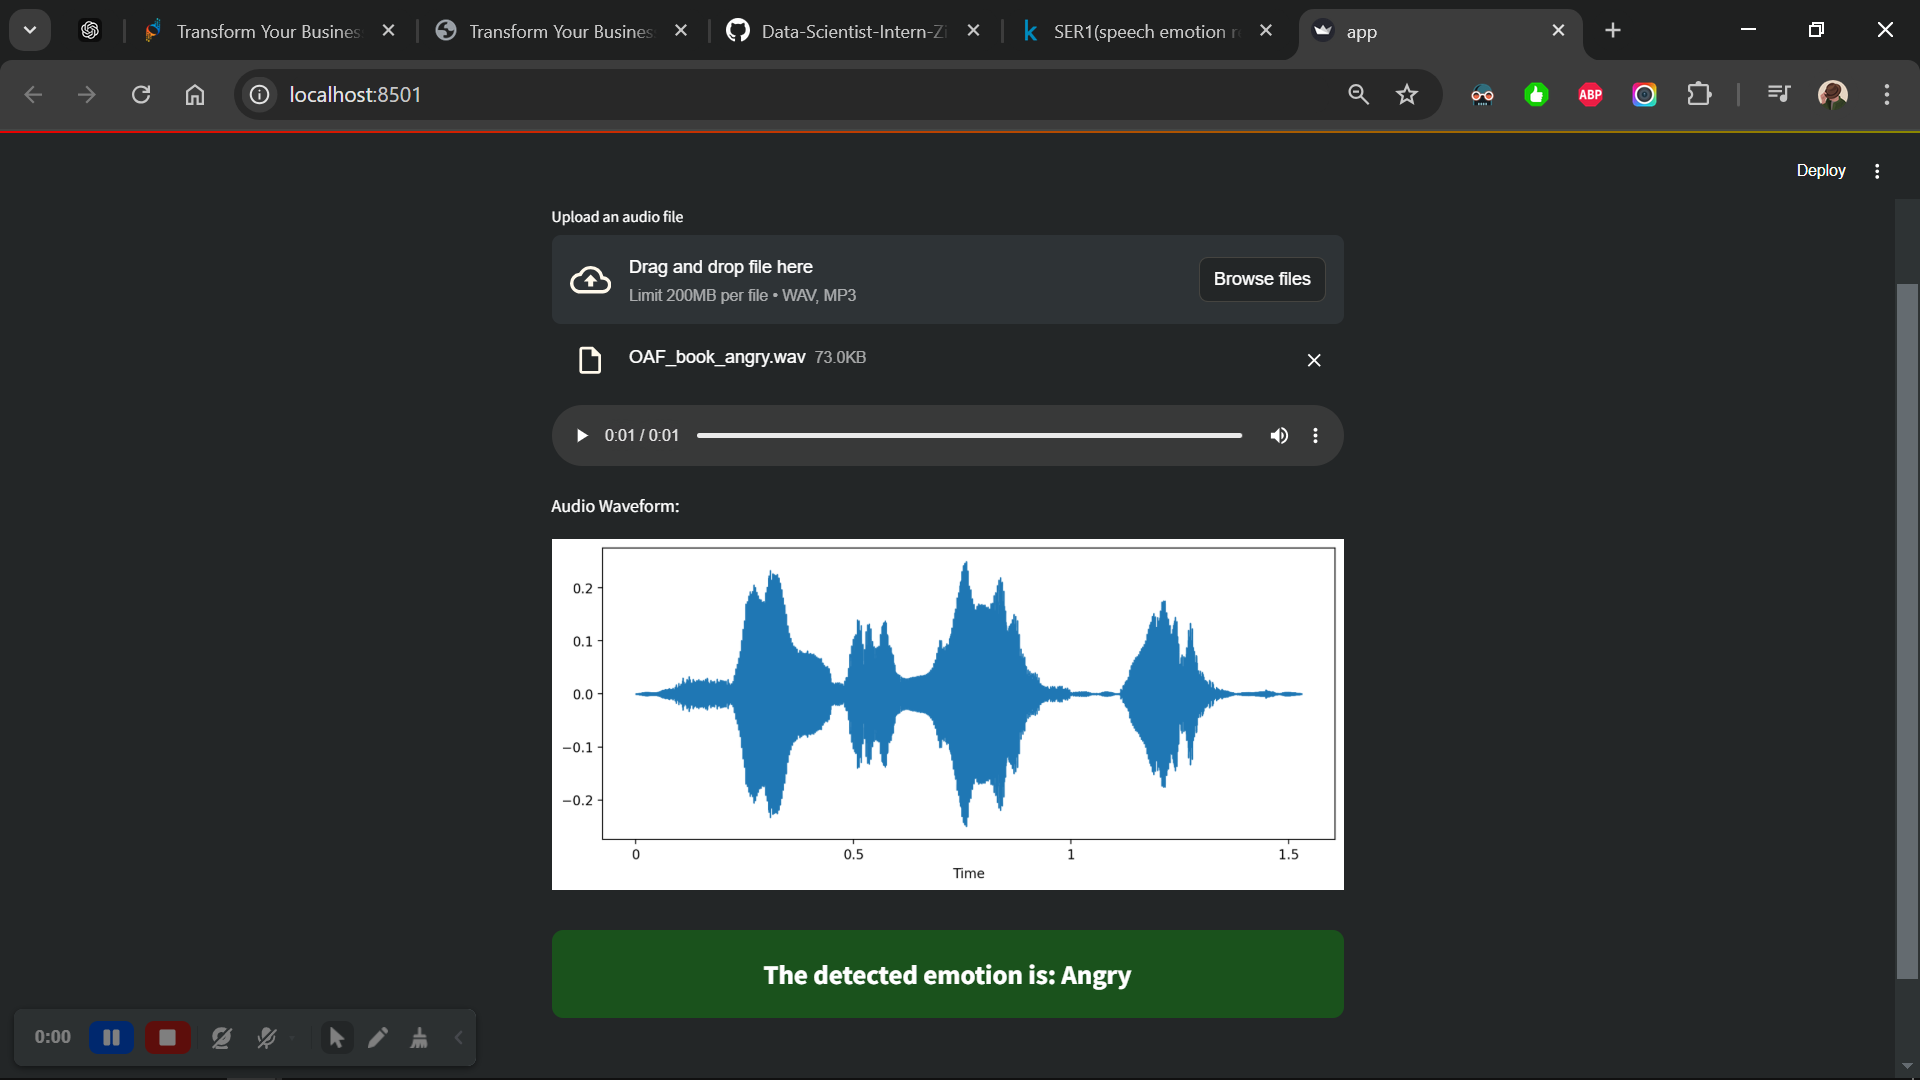

<iframe width="560" height="315" src="https://www.youtube.com/embed/bngfi7Qy-Rs?si=IMiK2JlbDfphrZDc" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>


### 1. Here is my entire project code Link on github:
* Github Link: https://github.com/SHINU4RATHOD/Data-Scientist-Intern-Zidio-Development/tree/main/1_Project_01_SER(Speech%20Emotion%20Recognition)

### Youtube Project Explantion video:
* Youtube Link :  https://www.youtube.com/watch?v=bngfi7Qy-Rs&list=PLPILFCzuvU7fMzEzxZ4PxeFw1kSQ2bBFr&index=2

# Importing all required Modules


In [ ]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset


In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input/toronto-emotional-speech-set-tess'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

In [ ]:
len(paths)

In [ ]:
paths[:5]  ## Displaying some sample paths 

In [ ]:
labels[:5] # Displaying some sample labels

In [ ]:
# Creating a DataFrame with speech file paths and their corresponding labels
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

#### Visualizing the distribution of different emotion labels in the dataset


In [ ]:
df['label'].value_counts()   # we can see its balance dataset

#### EDA(Exploratory Data Analysis)

In [ ]:
sns.countplot(data=df, x='label')

In [ ]:
# =============================================================================
# Waveplots - Show the loudness of the audio over time.
# Spectograms - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.
# =============================================================================

In [ ]:
# Function to plot the waveform (loudness over time) of an audio signal
def waveplot(data, sr, emotion):
    plt.figure(figsize=(8,2))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)  # Displaying waveplot using librosa
    plt.show()

In [ ]:
# Function to plot the spectrogram (frequency spectrum) of an audio signal
def spectogram(data, sr, emotion):
    x = librosa.stft(data)  # Applying short-time Fourier transform
    xdb = librosa.amplitude_to_db(abs(x))  # Converting amplitude to decibels
    plt.figure(figsize=(8,2))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')  # Displaying spectrogram
    plt.colorbar()

In [ ]:
# Example of waveplot and spectrogram for 'fear' emotion
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[210]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
# Example of waveplot and spectrogram for 'angry' emotion
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[150]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
# Example of waveplot and spectrogram for 'disgust' emotion
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[200]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
# Example of waveplot and spectrogram for 'neutral' emotion
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[210]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
# Example of waveplot and spectrogram for 'sad' emotion
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
################### # Data Augmentation Functions Adding more variations to the training data(tech: time_stretch, pitch_shift, noise injection,)
def augment_audio(data, sr):
    # Randomly apply one or more augmentations
    if np.random.random() < 0.5:
        data = librosa.effects.time_stretch(data, rate=np.random.uniform(0.8, 1.2))  # Time Stretching: Stretch or compress the audio without altering the pitch.
    # if np.random.random() < 0.5:          # Pitch Shifting: Modify the pitch of the audio.
    #     n_steps = np.random.uniform(-5, 5)     # Randomly shift pitch between -5 and +5 semitones
    #     data = librosa.effects.pitch_shift(data, sr, n_steps)
    if np.random.random() < 0.5:
        noise = np.random.randn(len(data))    #Noise Injection: Add random noise to the audio.
        data = data + 0.005 * noise
        
    if np.random.random() < 0.5:   # Time Shifting: Shift the audio signal in time.
        shift = np.random.randint(-sr // 10, sr // 10)  # Shift by up to 0.1 seconds
        data = np.roll(data, shift)  # Roll the array elements
        if shift > 0:
            data[:shift] = 0   # # Zero out the empty indices if rolling exceeds length
        else:
            data[shift:] = 0 
    return data

### Feature Extraction


In [ ]:
def extract_mfcc(filename, augment=False):
    y, sr = librosa.load(filename, duration=3, offset=0.5) # Load the audio file with a maximum duration of 3 seconds and an offset of 0.5 seconds.
    
    # If we want to apply audio augmentation (changing the audio slightly), do it here.
    if augment:
        y = augment_audio(y, sr)  # Call the augment_audio function to change the audio.
        
        # Check if the augmented audio data is a 1D array (like a single line of numbers).
        if y.ndim != 1:
            raise ValueError("Augmented audio data is not a 1D array.")  # Raise an error if the shape is wrong.
    
    # Extract the MFCC features from the audio. # MFCC (Mel-Frequency Cepstral Coefficients) are special features that help us understand the sound.
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)  # Calculate and average the MFCCs.
    
    return mfcc  # Return the MFCC features so we can use them later.


In [ ]:
extract_mfcc(df['speech'][0])

In [ ]:
# Now we extract features from all the audio files in the 'speech' column of our DataFrame.
# We apply augmentation to some and keep the original audio for comparison.
X_mfcc_augmented = df['speech'].apply(lambda x: extract_mfcc(x, augment=True))  # Extract features with audio changes.
X_mfcc_original = df['speech'].apply(lambda x: extract_mfcc(x, augment=False))  # Extract features without changes.


In [ ]:
X_mfcc_augmented

In [ ]:
X_mfcc_original

In [ ]:
X_mfcc_augmented.shape, X_mfcc_augmented.shape

In [ ]:
# Combine augmented and original MFCC features into one dataset.
# This helps us use both types of data (original and changed) for training our model.
X_combined = pd.concat([X_mfcc_augmented, X_mfcc_original], axis=0)  # Concatenate along rows (axis=0).
X = np.array([x for x in X_combined])  # Convert the combined features into a NumPy array for easier processing.
X = np.expand_dims(X, -1)  # Add an extra dimension to make the shape compatible with the LSTM model.
X.shape

In [ ]:
# Combine original and augmented labels & # Encoding the labels (emotion classes) into one-hot encoded format
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y_combined = pd.concat([df['label'], df['label']], axis=0).to_numpy()  # Convert to NumPy array
# Fit the OneHotEncoder to our combined labels and transform them into a one-hot encoded format.
# One-hot encoding turns labels into binary format, which is easier for the model to understand.
y = enc.fit_transform(y_combined[:, np.newaxis]).toarray()
y, y.shape

In [ ]:
############## Creating/Building LSTM model for Speech Emotion Recognition
# Import the necessary libraries for building the LSTM model.
from keras.models import Sequential  # Import the Sequential model type.
from keras.layers import Dense, LSTM, Dropout  # Import layers for the model.

# Build the LSTM model using a sequential approach, layer by layer.
model = Sequential([  
    # First LSTM layer with 256 units (neurons).
    # 'return_sequences=False' means the output will be the last output in the sequence.
    # 'input_shape=(40,1)' specifies that the input data has 40 features and 1 time step.
    LSTM(256, return_sequences=False, input_shape=(40,1)),  
    
    # First dense (fully connected) layer with 128 units and ReLU activation function.
    # ReLU helps the model learn complex patterns by allowing it to output zero for negative inputs.
    Dense(128, activation='relu'),  
    
    # Second dense layer with 64 units and ReLU activation.
    Dense(64, activation='relu'),   
    
    # Third dense layer with 64 units and ReLU activation.
    Dense(64, activation='relu'),  
    
    # Dropout layer to prevent overfitting by randomly setting 20% of the neurons to zero during training.
    Dropout(0.2),  
    
    # Fourth dense layer with 32 units and ReLU activation.
    Dense(32, activation='relu'),  
    
    # Another dropout layer to further help with regularization, reducing overfitting.
    Dropout(0.1),  
    
    # Final output layer with 7 units and softmax activation function.
    # Softmax converts the output to probabilities for 7 emotion classes (e.g., happy, sad, angry).
    Dense(7, activation='softmax')  
])

# Compile the model by specifying the loss function, optimizer, and metrics to track.
# 'categorical_crossentropy' is used for multi-class classification problems.
# 'adam' is a popular optimizer that adjusts the learning rate during training.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

In [ ]:
# Display a summary of the model's architecture, including the number of parameters.
model.summary()  

In [ ]:
# IMPORT LIBRARIES TO MONITOR AND CONTROL TRAINING
from keras.callbacks import ModelCheckpoint, EarlyStopping  # Import tools to control model training and save progress.

# ModelCheckpoint: Save the model during training whenever it improves.
# "mymodel.keras" is the file name where the best model will be saved.
# 'monitor' is set to 'val_accuracy', so it saves the model whenever the validation accuracy improves.
# 'verbose=1' ensures that details are printed when the model is saved.
# 'save_best_only=True' ensures only the model with the highest validation accuracy is saved.
# 'save_weights_only=False' saves the full model (architecture and weights).
checkpoint = ModelCheckpoint("mymodel.keras", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False)

# EarlyStopping: Stop training early if the validation accuracy doesn't improve.
# 'monitor' is set to 'val_accuracy', so it checks the validation accuracy to decide when to stop.
# 'min_delta=0' means any improvement, no matter how small, is considered.
# 'patience=10' allows training to continue for 10 more epochs after the last improvement before stopping.
# 'verbose=1' prints information when training stops early.
# 'mode=auto' lets Keras decide whether higher or lower values are better based on the monitored metric (accuracy in this case).
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto')

# Train the model and use the callbacks for monitoring:
# 'validation_split=0.2' means 20% of the data is used for validation during training.
# 'epochs=50' sets the maximum number of epochs (training cycles).
# 'batch_size=64' defines how many samples are processed at once before updating the model's weights.
# 'validation_steps=5' means validation data is split into 5 steps during training.
# 'callbacks=[checkpoint, early]' includes both callbacks to save the best model and stop early if needed.
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64, validation_steps=5, callbacks=[checkpoint, early])


### Plotting training and validation accuracy  and  training and validation loss as well 


In [ ]:
# Plotting the training and validation accuracy across epochs
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Plotting the training and validation loss across epochs
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()